<a href="https://colab.research.google.com/github/pr0fez/AI24-Programmering/blob/master/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../assets/numpy_1b.png" width = 300>

</details>




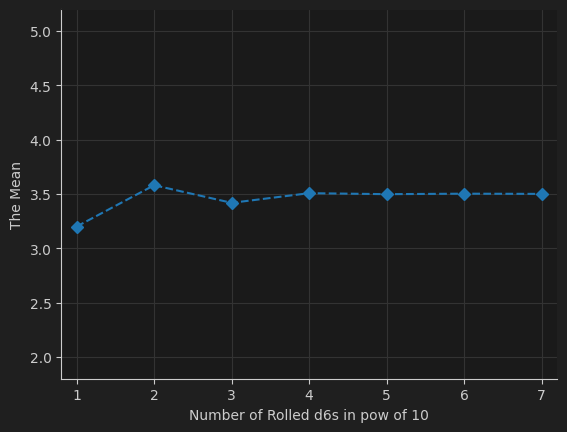

In [63]:
#10.1
import numpy as np
from random import randint as rng 
from matplotlib import pyplot as plt 

mean_py = sum(range(1,7))/6
mean_np = np.mean(range(1,7))

def die_roll(ran:int)->list:
    return [ np.mean([rng(1,6) for n in range(10**ins)]) for ins in range(1,ran+1)]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(1.8,5.2)
ax.set_xlim(0.8,7.2)

ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.plot( range(1,8), die_roll(7), linestyle="dashed", marker="D")
plt.xlabel("Number of Rolled d6s in pow of 10")
plt.ylabel("The Mean")
plt.show()


--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../assets/numpy2d.png" width = 300>


e) 

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

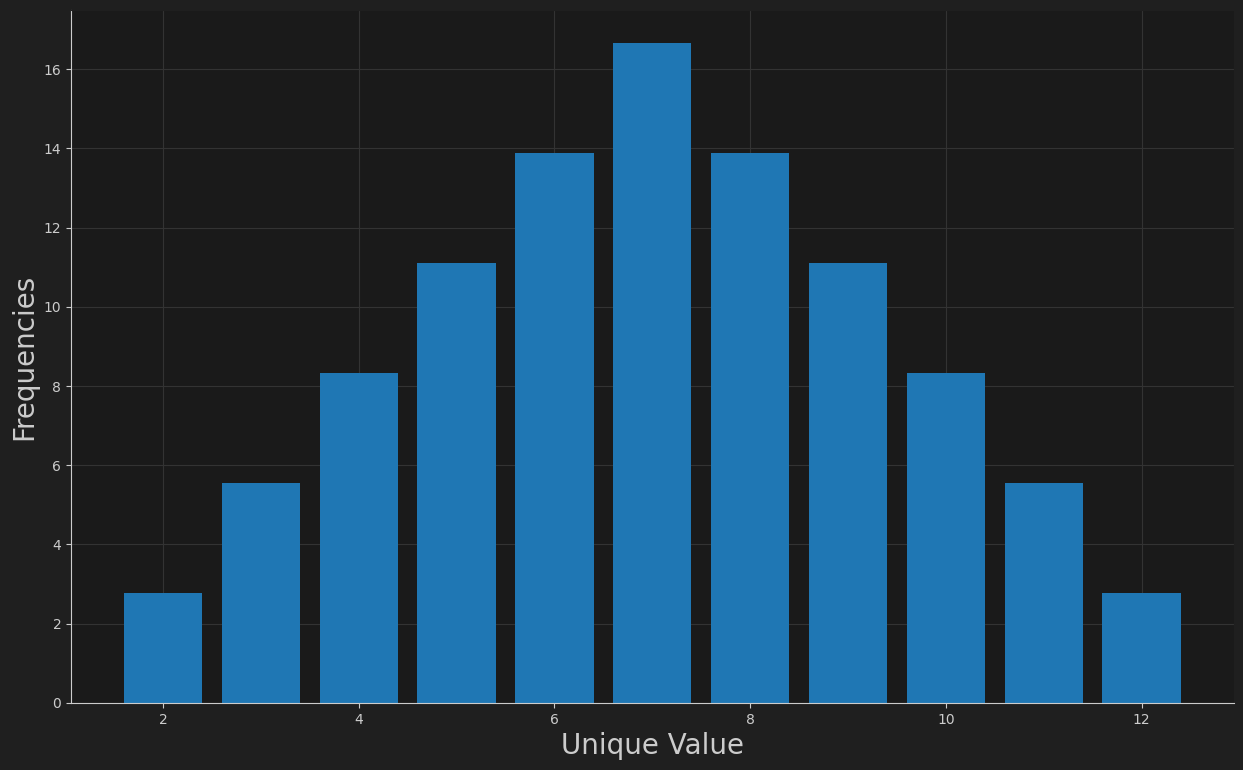

279936


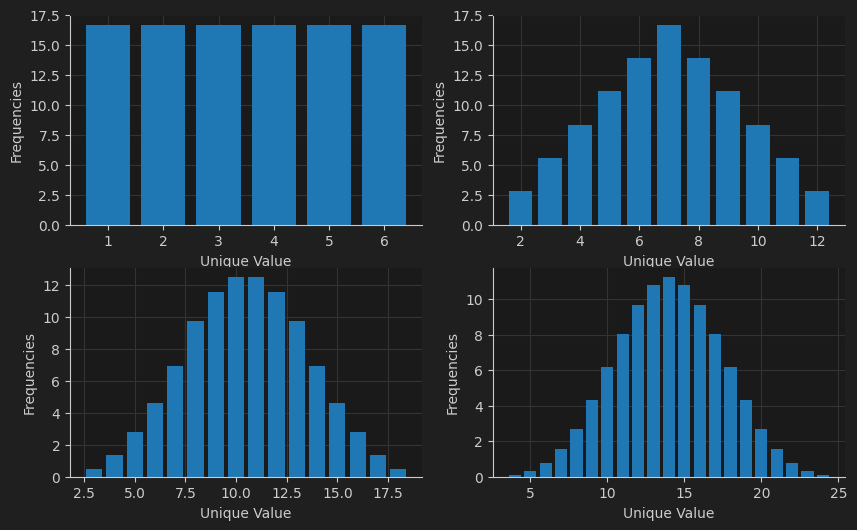

In [75]:
#10.2
import numpy as np 
import matplotlib.pyplot as plt
from random import randint as rng

#A-D)
die = [1,2,3,4,5,6]
combi = { (d1, d2) : 0 for d2 in range(1,7) for d1 in range(1,7) }

d = 100/len(combi)

combi_sum_frq = dict()
for key in combi.keys():
    tot = key[0]+key[1]
    combi_sum_frq[tot] = combi_sum_frq[tot]+d if combi_sum_frq.get(tot) else d


fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8) )
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8) )
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))
plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))


plt.bar( [key for key in combi_sum_frq.keys()], [val for val in combi_sum_frq.values()], zorder=2 )

plt.ylabel("Frequencies", fontsize=20, color=(0.8, 0.8, 0.8))
plt.xlabel("Unique Value", fontsize=20, color=(0.8, 0.8, 0.8))
plt.show()


#C)
def roll(nd:int, dx:int, d=None )->dict:
    
    if nd < 2 and d == None: 
        return { (n,) : 0 for n in range(1,dx+1) }
    elif nd < 2:
        return { (*key, n) : 0 for n in range(1, dx+1) for key in d.keys() }
    elif d == None : 
        return roll(nd-1, dx, { (n,) : 0 for n in range(1,dx+1) } )
    else: 
        return roll(nd-1, dx, { (*key, n) : 0 for n in range(1, dx+1) for key in d.keys() } )

def frequency(dies:dict)->dict:
    #frequency_per_die
    fpd = 100/len(dies)
    dies_frq=dict()
    for key in dies.keys():
        tot = sum(key)
        dies_frq[tot] = dies_frq[tot]+fpd if dies_frq.get(tot) else fpd
    return dies_frq

print( len(roll(7, 6)) )
dies_frq = [ frequency( roll(n, 6) ) for n in range(1, 5) ]


def subplot(nosp):
    ax = list()
    fig = plt.figure(figsize=(10,6))
    fig.set_facecolor((0.12, 0.12, 0.12))
    fig.tight_layout()
    #fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
 
    for i in range(nosp):        
        ax.append( plt.subplot(2,2,i+1) )
        ax[i].set_facecolor((0.1, 0.1, 0.1))
        ax[i].tick_params(axis='x', colors=(0.8, 0.8, 0.8) )
        ax[i].tick_params(axis='y', colors=(0.8, 0.8, 0.8) )
        ax[i].spines['bottom'].set_color((0.8, 0.8, 0.8))
        ax[i].spines['left'].set_color((0.8, 0.8, 0.8))
        ax[i].spines['top'].set_color((0.12, 0.12, 0.12))
        ax[i].spines['right'].set_color((0.12, 0.12, 0.12))
        ax[i].set_ylabel("Frequencies", fontsize=10, color=(0.8, 0.8, 0.8))
        ax[i].set_xlabel("Unique Value", fontsize=10, color=(0.8, 0.8, 0.8))

        ax[i].grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
        ax[i].bar([key for key in dies_frq[i].keys()], [val for val in dies_frq[i].values()], zorder=2)

    plt.show()
   

subplot(4)






--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

In [160]:
import numpy as np

nx, ny = (11, 11)
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
xv, xy = np.meshgrid(x, y)
#points = np.array([[xv],[xy]])

nx, ny = (5, 5)
x = np.linspace(1, 5, nx)
y = np.linspace(1, 5, ny)
xv, xy = np.meshgrid(x, y)
#points = np.array([[xv],[xy]])
"""
for x in range(len(xv)):
    for y in range(len(xv[x])):
        xv[x, y]*=2

print(xv)  

for x in np.nditer(xy):
    x*+3
print(xy)
"""
for i, v in np.ndenumerate(xy):
    xy[i]+=xv[i]
print(xy)

xc = np.copy(xv)
xc[0, 0] = 500
xv

d = np.arange(6).reshape(2,3)
for x in np.nditer(d.T, order="C"):
    print(x, end=' ')

with np.nditer(d, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2 * x
d
print()
cx = np.arange(1,7).reshape(2,3)
cy = np.arange(10,70,10).reshape(2,3)
for rx, ry in zip(cx, cy):
    for x, y in zip(rx, ry):
        print(x, y)
        

[[ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]]
0 3 1 4 2 5 
1 10
2 20
3 30
4 40
5 50
6 60


In [194]:
import numpy as np 
nx, ny = (5, 5)
x = np.linspace(1, 5, nx)
y = np.linspace(1, 5, ny)
a, b = np.meshgrid(x, y)

print(a)
print()
print(b)
print()
print(a+b)
print()
a*=b
print(a)

print()

b = np.where(b > 3, "white", "red" )
print(b) 

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]

[[ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]]

[[ 1.  2.  3.  4.  5.]
 [ 2.  4.  6.  8. 10.]
 [ 3.  6.  9. 12. 15.]
 [ 4.  8. 12. 16. 20.]
 [ 5. 10. 15. 20. 25.]]

[['red' 'red' 'red' 'red' 'red']
 ['red' 'red' 'red' 'red' 'red']
 ['red' 'red' 'red' 'red' 'red']
 ['white' 'white' 'white' 'white' 'white']
 ['white' 'white' 'white' 'white' 'white']]


[['white' 'white' 'white' ... 'white' 'white' 'white']
 ['white' 'white' 'white' ... 'white' 'white' 'white']
 ['white' 'white' 'white' ... 'white' 'white' 'white']
 ...
 ['white' 'white' 'white' ... 'white' 'white' 'white']
 ['white' 'white' 'white' ... 'white' 'white' 'white']
 ['white' 'white' 'white' ... 'white' 'white' 'white']]
Points Color <class 'numpy.ndarray'>


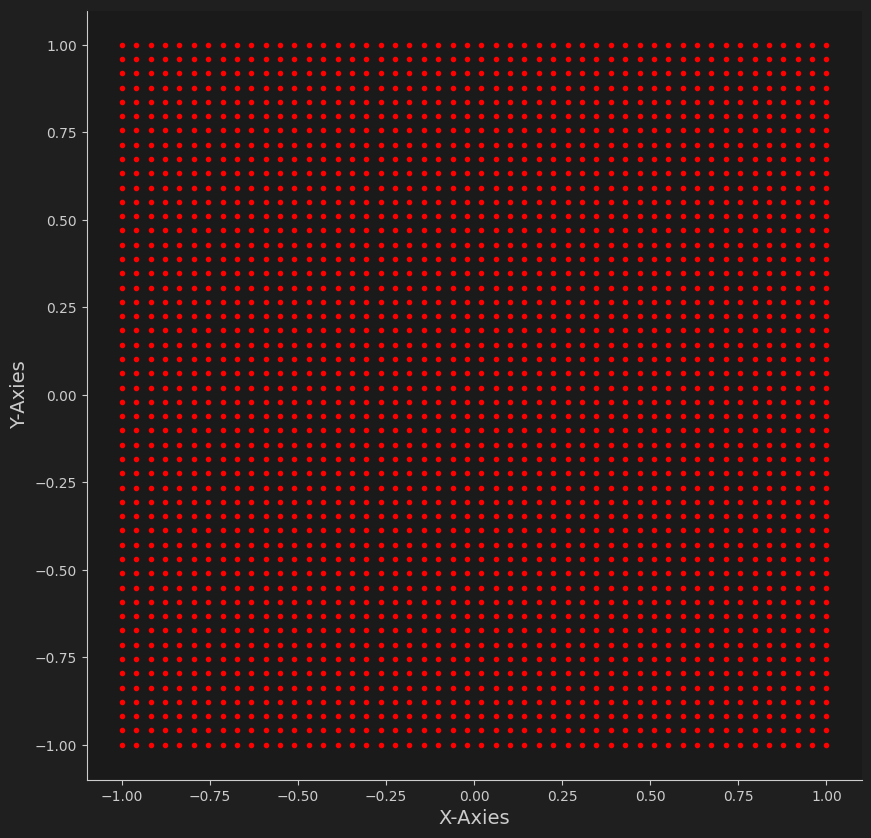

In [196]:
#10.03
import matplotlib.pyplot as plt
import math
import numpy as np 




nx, ny = (50, 50)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv, xy = np.meshgrid(x, y)
#points = np.array([[xv],[xy]])


"""
def euclidean_distance(cx,cy):
    eud = list()
    for x in range(len(cx)):
        for y in range(len(cx[x])):
            eud.append( math.sqrt((cx[x,y]**2 + cy[x,y]**2)) )
    return eud 
points_eud = euclidean_distance(xv, xy)
"""
def euclidean_distance(x,y):
    return np.sqrt(x**2+y**2)

points_euclidean = euclidean_distance(xv, xy)
points_color = np.where(points_euclidean > 0.5, "white", "red" ) 
print(points_color)
print("Points Color",type(points_color))
"""
def set_color(points):    
    return ['red' if e < 0.5 else 'white' for e in points ]
""" 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-1.1,1.1)

ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

#plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

#plt.scatter([e[0] for e in points], [e[1] for e in points], color=set_color(points_eud), marker=".", zorder=2)
plt.scatter(xv, xy, color='red', marker=".", zorder=2)
plt.ylabel("Y-Axies", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("X-Axies", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()

---

pr0fez Giang

[LinkedIn][linkedIn_pr0fez]

[GitHub portfolio][github_portfolio]

[linkedIn_pr0fez]: https://www.linkedin.com/in/pr0fezgiang/
[github_portfolio]: https://github.com/pr0fez/Portfolio-pr0fez-Giang

---